# 0. Imports

In [1]:
import sys
sys.path.append("src/")

from image_captioning import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split

import torch

from transformers import VisionEncoderDecoderModel
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer, default_data_collator

# 1. Model Read In

In [2]:
model = torch.load("img_caption_model.pt")

# 2. Validation Data Read In

In [3]:
df = pd.DataFrame(columns=["imgs"])
imgs, captions = [], []
root_dir = Path("../data/flickr8k")

with open(root_dir / "captions.txt", "r") as f:
    content = f.readlines()
    
for line in content:
    line = line.strip().split("|")

    # extract the required informations
    img_path = line[0]
    caption_number = line[1]
    caption = line[-1]

    # check if the caption_number is equal to 1
    if caption_number == "1":
        # store the image path
        imgs.append(root_dir / "images" / img_path)
        # store the caption
        captions.append(caption)
        
df.loc[:, "imgs"] = imgs
df.loc[:, "captions"] = captions

In [4]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
test_ds = LoadDataset(test_df)

# 3. Validation of Model

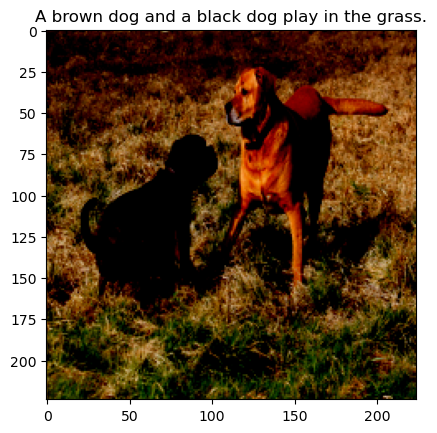

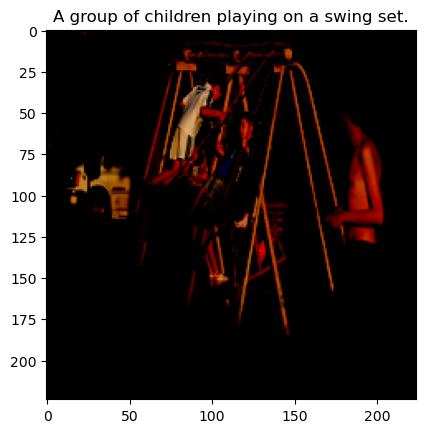

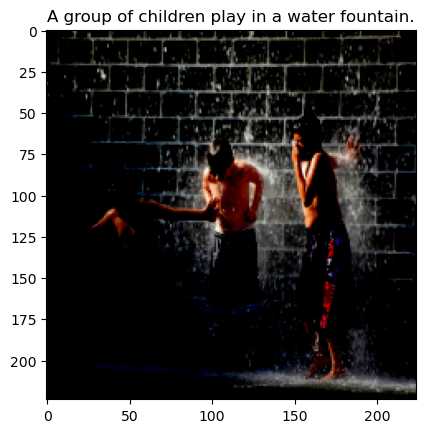

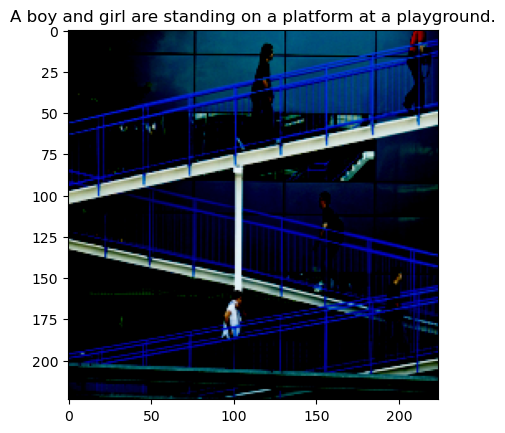

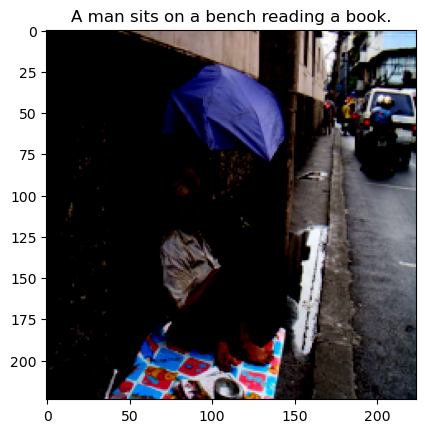

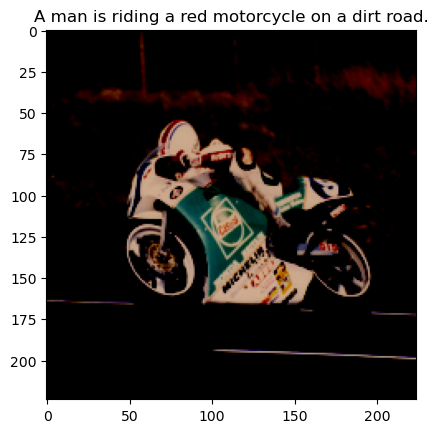

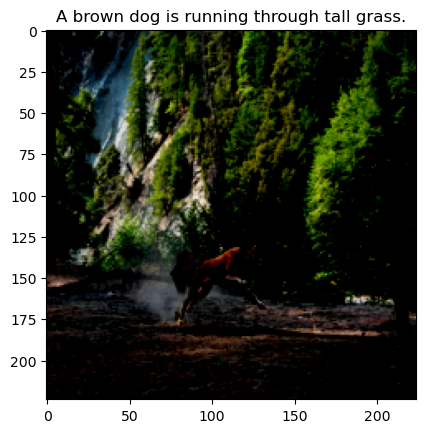

In [5]:
for idx in range(65, 100, 5):
    inputs = test_ds[idx]["pixel_values"]
    model.eval()

    num_beams = 4

    with torch.no_grad():
        out = model.generate(
            inputs.unsqueeze(0).to("cpu"),  # move inputs to GPU
            num_beams=num_beams,
        )
    # convert token ids to string format
    decoded_out = tokenizer.decode(out[0], skip_special_tokens=True)
    plt.figure()
    plt.imshow(np.clip(inputs.permute(1, 2, 0), 0, 1))
    plt.title(decoded_out)